In [ ]:
#Tom Deng
#662007936

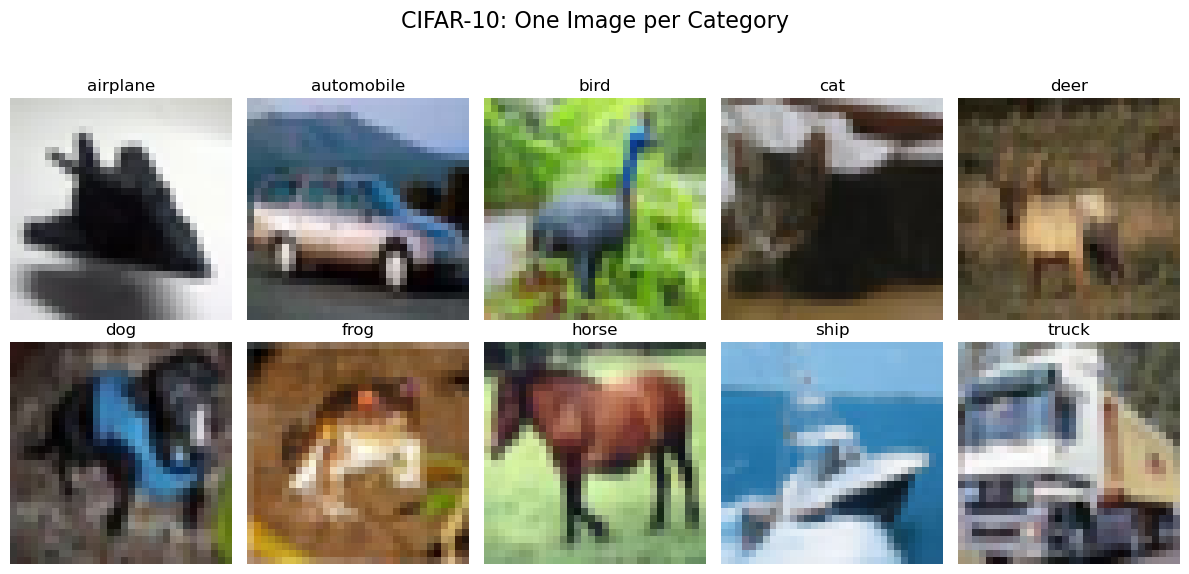

In [1]:
#Problem 1a
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Define the class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot one image per category from the training set
plt.figure(figsize=(12, 6))

for i in range(10):
    # Find the first index where the label equals i
    idx = np.where(y_train.flatten() == i)[0][0]
    image = x_train[idx]
    
    # Create a subplot: 2 rows x 5 columns
    plt.subplot(2, 5, i + 1)
    plt.imshow(image)
    plt.title(class_names[i])
    plt.axis('off')

plt.suptitle("CIFAR-10: One Image per Category", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [5]:
#Problem 1b
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier  # Use SciKeras instead of the legacy wrapper
from sklearn.model_selection import GridSearchCV, train_test_split

# Load the CIFAR-10 dataset
(x_full, y_full), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to [0, 1]
x_full = x_full.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Use a 70%-30% split for training and validation data
x_train, x_val, y_train, y_val = train_test_split(x_full, y_full, test_size=0.3, random_state=42)
y_train = y_train.flatten()  # Flatten labels from shape (n,1) to (n,)
y_val = y_val.flatten()

# Define a function to create the neural network model.
def create_model(neurons=128, dropout_rate=0.0, learning_rate=0.001):
    model = Sequential()
    # Input layer: flatten CIFAR-10 images of shape (32,32,3)
    model.add(Flatten(input_shape=(32, 32, 3)))
    # Hidden dense layer with a variable number of neurons and ReLU activation
    model.add(Dense(neurons, activation='relu'))
    # Optional dropout layer for regularization
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    # Output layer for 10 classes with softmax activation
    model.add(Dense(10, activation='softmax'))
    
    # Compile the model using Adam optimizer with the specified learning rate
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

# Wrap the model using SciKeras's KerasClassifier
model_wrapper = KerasClassifier(model=create_model, verbose=0)

# Define the grid of hyperparameters to search over.
# Note: When using SciKeras, the hyperparameters for the underlying model need to be prefixed with 'model__'
param_grid = {
    'model__neurons': [64, 128],
    'model__dropout_rate': [0.0, 0.2],
    'model__learning_rate': [0.001, 0.01],
    'batch_size': [32, 64],
    'epochs': [10]  # Using 10 epochs for demonstration purposes
}

# Set up the GridSearchCV object using 3-fold cross-validation
grid = GridSearchCV(estimator=model_wrapper, param_grid=param_grid, cv=3)

# Perform grid search on the training set
grid_result = grid.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best Accuracy: {:.4f} using {}".format(grid_result.best_score_, grid_result.best_params_))


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [6]:
#Problem 1 c

# Refit the best estimator on the training set with validation data
# (This step is done to capture the training history on the full training set with our separate validation set)
# Note: best_model is the best estimator from grid search.
best_model = grid_result.best_estimator_

# Refit using the training (x_train, y_train) and validation (x_val, y_val) sets.
# We use the same number of epochs that were selected by the grid search.
best_epochs = best_model.get_params()['epochs']
best_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=best_epochs, verbose=0)

# Retrieve the training history from the SciKeras wrapper (stored in best_model.history_)
history_tuned = best_model.history_

# Extract loss values from the history
train_loss = history_tuned['loss']
val_loss = history_tuned['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation losses over epochs
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Losses of the Tuned Network')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


NameError: name 'grid_result' is not defined

In [8]:
#problem 1d
# Extract training and validation accuracies from the history of the best model
train_accuracy = best_model.history_['accuracy']
val_accuracy = best_model.history_['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

# Plot the training and validation accuracies over epochs
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy of the Tuned Network')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


NameError: name 'best_model' is not defined

C:\Users\Tom\AppData\Local\Temp\ipykernel_14268\1723980045.py:21: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  airfoil_data = pd.read_csv(url, delim_whitespace=True, names=columns)


   Frequency  Angle_of_Attack  Chord_Length  Free_Stream_Velocity  \
0        800              0.0        0.3048                  71.3   
1       1000              0.0        0.3048                  71.3   
2       1250              0.0        0.3048                  71.3   
3       1600              0.0        0.3048                  71.3   
4       2000              0.0        0.3048                  71.3   

   Suction_Side_Displacement_Thickness  Scaled_Sound_Pressure_Level  
0                             0.002663                      126.201  
1                             0.002663                      125.201  
2                             0.002663                      125.951  
3                             0.002663                      127.591  
4                             0.002663                      127.461  


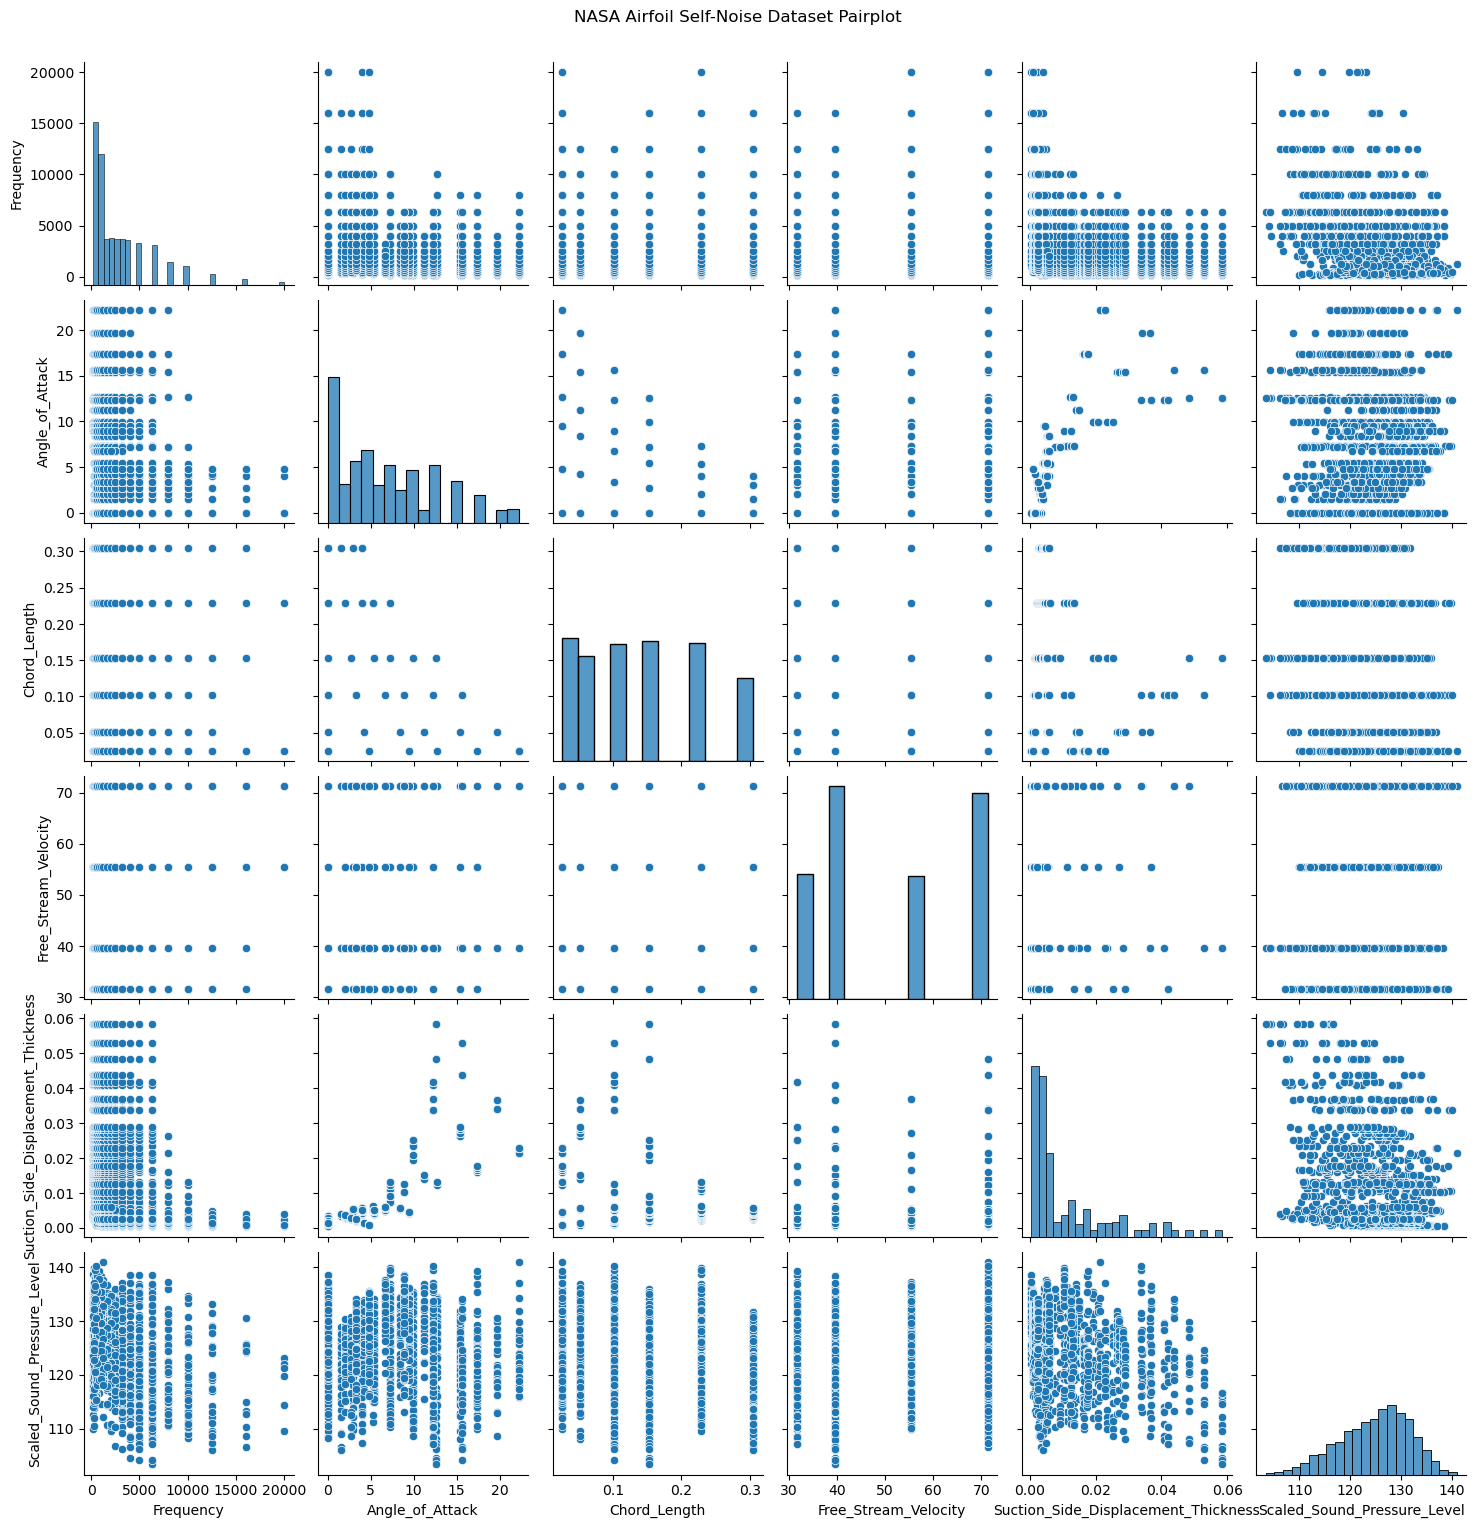

In [9]:
#Problem 2 a
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL for the dataset from the UCI repository
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat"

# Define the column names:
# 1. Frequency (Hz)
# 2. Angle of attack (degrees)
# 3. Chord length (m)
# 4. Free-stream velocity (m/s)
# 5. Suction side displacement thickness (m)
# 6. Scaled sound pressure level (dB)
columns = ["Frequency", "Angle_of_Attack", "Chord_Length", 
           "Free_Stream_Velocity", "Suction_Side_Displacement_Thickness", 
           "Scaled_Sound_Pressure_Level"]

# Load the dataset (the file is whitespace-delimited)
airfoil_data = pd.read_csv(url, delim_whitespace=True, names=columns)

# Display the first few rows for verification
print(airfoil_data.head())

# Visualize the dataset using a pairplot to see the distributions and pairwise relationships
sns.pairplot(airfoil_data)
plt.suptitle("NASA Airfoil Self-Noise Dataset Pairplot", y=1.02)
plt.show()


In [11]:
#Problem 2b
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Separate the features (X) and the target (y)
X = airfoil_data.drop("Scaled_Sound_Pressure_Level", axis=1)
y = airfoil_data["Scaled_Sound_Pressure_Level"]

# Split the data into 70% training and 30% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (this is important for neural network training)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Build the fully connected neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer with 5 features
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression (no activation, linear output)
])

# Compile the model using Mean Squared Error as the loss function and Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse',
              metrics=['mae'])

# Train the model; here we use 50 epochs and a batch size of 32 (adjust as needed)
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32,
                    validation_data=(X_val_scaled, y_val))



Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 15622.1934 - mae: 124.7953 - val_loss: 15388.0107 - val_mae: 123.8542
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15275.1055 - mae: 123.3839 - val_loss: 14879.0254 - val_mae: 121.7695
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14662.0713 - mae: 120.8518 - val_loss: 13783.1719 - val_mae: 117.1465
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13250.2578 - mae: 114.7790 - val_loss: 11753.3105 - val_mae: 108.0165
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11169.4385 - mae: 105.0551 - val_loss: 8712.8145 - val_mae: 92.5349
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7738.0093 - mae: 86.5365 - val_loss: 5133.6304 - val_mae: 69.6579
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4359.1558 - mae: 62.9489 - val_loss: 2277.8174 - val_mae: 43.4563
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1980.9077 - mae: 39.2309 - val_loss: 937.1115 - val_mae

In [12]:
from sklearn.metrics import r2_score

# Predict the scaled sound pressure level on the validation set
y_val_pred = model.predict(X_val_scaled).flatten()

# Calculate the coefficient of determination (R² score)
r2 = r2_score(y_val, y_val_pred)
print("Coefficient of Determination (R²) on the Validation Set:", r2)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Coefficient of Determination (R²) on the Validation Set: -0.07674397529322685
